# Moore's Law Verification with **_Linear Regression_**

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_squared_error, r2_score, f1_score, confusion_matrix
from sklearn.datasets import load_digits
import statsmodels.api as sm

## Preparing the Data

In [2]:
cpu_benchmarks = pd.read_csv('benchmarks.csv', na_values='--')
cpu_benchmarks = pd.concat([cpu_benchmarks, pd.DataFrame(list(  # splitting 'cpu95-19990503-03574' into 3 columns
    cpu_benchmarks['testID'].str.split('-').values), columns=['cpu_year', 'date', 'id'])], axis=1)
# adjusting benchmark values
cpu_benchmarks.loc[cpu_benchmarks['cpu_year'] == 'cpu2006', ['base', 'peak']] *= 100
cpu_benchmarks.loc[cpu_benchmarks['cpu_year'] == 'cpu95', ['base', 'peak']] *= 10

# formatting dates as datetimes
dates = cpu_benchmarks['date'].copy()
dates[dates.str.len() < 8] = '19' + dates[dates.str.len() < 8]  # some dates in 1990s are marked just as '96', '98' etc
dates = pd.to_datetime(dates.str[:4] + '-' + dates.str[4:6] + '-' + dates.str[6:])  # '19990104' -> '1999-01-04', etc
cpu_benchmarks['date'] = dates

## Plotting

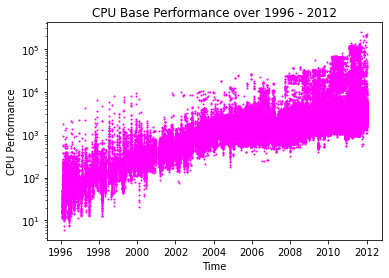

In [3]:
plot_data = cpu_benchmarks.copy()[['date', 'base', 'peak']].dropna()
x = plot_data['date'].copy()
y = plot_data['base'].copy()

plt.plot_date(x, y, c='magenta', markersize=1)

plt.yscale('log')
plt.xlabel('Time')
plt.ylabel('CPU Performance')
plt.title('CPU Base Performance over 1996 - 2012')
plt.show()

## Linear Regression

### Preprocessing

In [4]:
x = x.astype('int64') / 1e9 / (60 * 60 * 24 * 365) # ns to s to years
y = np.log2(y)

### Model Summary

In [5]:
model = sm.OLS(y, x).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                   base   R-squared (uncentered):                   0.991
Model:                            OLS   Adj. R-squared (uncentered):              0.991
Method:                 Least Squares   F-statistic:                          1.430e+07
Date:                Sun, 17 Jan 2021   Prob (F-statistic):                        0.00
Time:                        22:50:45   Log-Likelihood:                     -1.9027e+05
No. Observations:              130721   AIC:                                  3.805e+05
Df Residuals:                  130720   BIC:                                  3.806e+05
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
date           0.2860   7.56e-05   3781.346      0.000       0.286       0.286
==============================================================================
Omnibus:                    28062.178   Durbin-Watson:                   1.509
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            90114.677
Skew:                           1.093   Prob(JB):                         0.00
Kurtosis:                       6.430   Cond. No.                         1.00
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [6]:
print('Increase over 1 year:\t', 2 ** model.params[0])
print('Increase over 2 years:\t', (2 ** model.params[0]) ** 2)

Increase over 1 year:	 1.2192755394497217
Increase over 2 years:	 1.4866328411004097


So, while it's not exactly the case that computing power doubles every two years, as Moore's law predicts, it is the case that the growth is exponential and it grows by roughly 50% every two years.